# Analytics
The notebook will be used to clean, transform, analyze and visualize the data

# Libraries

In [120]:
import requests
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize
from pandasql import sqldf

# Load from files

In [98]:
dfLeaguesCSV = pd.read_csv('raw_data/leagues.csv')
dfTeamsCSV = pd.read_csv('raw_data/teams.csv')

# Initialize empty data frames
dfPlayersCSV = pd.DataFrame()
dfPlayerStatsCSV = pd.DataFrame()

# Load all players files
for name in glob.glob('raw_data/players_*.csv'):
    dfPlayersTemp = pd.read_csv(name)
    dfPlayersCSV = pd.concat([dfPlayersCSV, dfPlayersTemp])
    
# Load all player stats files
for name in glob.glob('raw_data/player_stats_*.csv'):
    dfPlayerStatsTemp = pd.read_csv(name)
    dfPlayerStatsCSV = pd.concat([dfPlayerStatsCSV, dfPlayerStatsTemp])

# Clean and transform

## Drop the fields not relevant to our analysis

In [ ]:
dfLeagues = dfLeaguesCSV.drop(['league_logo','country_flag','league_type'], axis=1)

dfTeams = dfTeamsCSV.drop(['team_national','team_logo','venue_address','venue_image'], axis=1)

## Join all data frames
There are several data frames. To perform data analysis and to build models we need to have just one. Hence we need to combine them.

In [99]:
# Join league and team data sets
dfFootball = dfTeams.merge(dfLeagues, left_on='league_id', right_on='league_id')

In [145]:
dfPlayersCSV

,player_id,player_name,player_firstname,player_lastname,player_age,player_birth_date,player_birth_place,player_birth_country,player_nationality,player_height,player_weight,player_injured,player_photo,league_id,season_id
0,311,O. Karnezis,Orestis Spyridon,Karnezis,37.0,1985-07-11,Athina,Greece,Greece,189 cm,79 kg,False,https://media-2.api-sports.io/football/players...,61,2021
1,1273,Jimmy Briand,Jimmy,Briand,37.0,1985-08-02,Vitry sur Seine,France,France,181 cm,84 kg,False,https://media-1.api-sports.io/football/players...,61,2021
2,2041,J. Gnagnon,Joris,Gnagnon,25.0,1997-01-13,Bondy,France,France,182 cm,89 kg,False,https://media-3.api-sports.io/football/players...,61,2021
3,2205,H. Ben Arfa,Hatem,Ben Arfa,35.0,1987-03-07,Clamart,France,France,178 cm,65 kg,False,https://media-2.api-sports.io/football/players...,61,2021
4,3344,Kalifa Coulibaly,Kalifa,Coulibaly,32.0,1991-08-21,Bamako,Mali,Mali,197 cm,84 kg,False,https://media-3.api-sports.io/football/players...,61,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5858,48019,M. Çelik,Mervan,Çelik,33.0,1990-05-26,Göteborg,Sweden,Sweden,180 cm,75 kg,False,https://media-2.api-sports.io/football/players...,203,2013
5859,51229,L. Mabiala,Larrys,Mabiala Destin,36.0,1987-10-08,Montfermeil,France,Congo DR,189 cm,84 kg,False,https://media-1.api-sports.io/football/players...,203,2013
5860,104937,Vitolo,Víctor José,Añino Bermúdez,40.0,1983-09-09,Santa Cruz de Tenerife,Spain,Spain,168 cm,68 kg,False,https://media-2.api-sports.io/football/players...,203,2013
5861,107626,Bruno Mezenga,Bruno,Ferreira Mombra Rosa,35.0,1988-08-08,Niterói,Brazil,Brazil,185 cm,78 kg,False,https://media-3.api-sports.io/football/players...,203,2013


## Duplicates

## Null values

## Distribution of number of teams in leagues for all seasons
It allows us to check if there are any issues with the data. The number of teams in any league and season should be between 10 and 25. The majority of leagues have 18-20 teams.

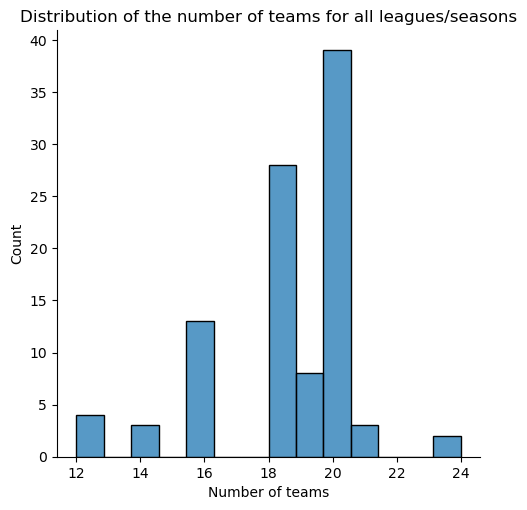

In [144]:
# Group by country and season
sns.displot(dfFootball.groupby(['country_name','season_id'])['season_id'].count())\
    .set(xlabel='Number of teams', title='Distribution of the number of teams for all leagues/seasons')

The result is exactly as described above.

## Distribution of players in teams

## Distribution of players/teams in leagues

## Distribution of players/teams/leagues in seasons

## Remove players missing in teams

In [47]:
sql = '''
SELECT *
FROM dfPlayerStats 
WHERE team_id NOT IN (select team_id from dfTeams)
'''

sqldf(sql)

,team_id,team_name,team_logo,league_id,league_name,league_country,league_logo,league_flag,league_season,games_appearences,...,cards_yellowred,cards_red,penalty_won,penalty_commited,penalty_scored,penalty_missed,penalty_saved,player_id,league_id.1,season_id
0,9256,Olympique Lyonnais II,https://media-2.api-sports.io/football/teams/9...,61,Ligue 1,France,https://media-3.api-sports.io/football/leagues...,https://media-2.api-sports.io/flags/fr.svg,2021,0.0,...,0.0,0.0,None,None,None,None,None,670,61,2021
1,4715,Excelsior Virton,https://media-3.api-sports.io/football/teams/4...,144,Jupiler Pro League,Belgium,https://media-2.api-sports.io/football/leagues...,https://media-3.api-sports.io/flags/be.svg,2021,0.0,...,0.0,0.0,None,None,None,None,None,163034,144,2021
2,1353,Swindon Town,https://media-2.api-sports.io/football/teams/1...,39,Premier League,England,https://media-3.api-sports.io/football/leagues...,https://media-2.api-sports.io/flags/gb.svg,2021,0.0,...,0.0,0.0,None,None,None,None,None,17968,39,2021
3,1342,Walsall,https://media-2.api-sports.io/football/teams/1...,39,Premier League,England,https://media-3.api-sports.io/football/leagues...,https://media-3.api-sports.io/flags/gb.svg,2021,0.0,...,0.0,0.0,None,None,None,None,None,157025,39,2021
4,1353,Swindon Town,https://media-1.api-sports.io/football/teams/1...,39,Premier League,England,https://media-1.api-sports.io/football/leagues...,https://media-1.api-sports.io/flags/gb.svg,2021,0.0,...,0.0,0.0,None,None,None,None,None,348463,39,2021
5,901,Partick,https://media-2.api-sports.io/football/teams/9...,39,Premier League,England,https://media-2.api-sports.io/football/leagues...,https://media-3.api-sports.io/flags/gb.svg,2021,0.0,...,0.0,0.0,None,None,None,None,None,1735,39,2021
6,901,Partick,https://media-2.api-sports.io/football/teams/9...,39,Premier League,England,https://media-2.api-sports.io/football/leagues...,https://media-3.api-sports.io/flags/gb.svg,2021,0.0,...,0.0,0.0,None,None,None,None,None,15430,39,2021
7,901,Partick,https://media-3.api-sports.io/football/teams/9...,39,Premier League,England,https://media-3.api-sports.io/football/leagues...,https://media-2.api-sports.io/flags/gb.svg,2021,0.0,...,0.0,0.0,None,None,None,None,None,20220,39,2021
8,901,Partick,https://media-3.api-sports.io/football/teams/9...,39,Premier League,England,https://media-2.api-sports.io/football/leagues...,https://media-2.api-sports.io/flags/gb.svg,2021,0.0,...,0.0,0.0,None,None,None,None,None,45204,39,2021
9,901,Partick,https://media-3.api-sports.io/football/teams/9...,39,Premier League,England,https://media-1.api-sports.io/football/leagues...,https://media-3.api-sports.io/flags/gb.svg,2021,0.0,...,0.0,0.0,None,None,None,None,None,45285,39,2021


## The same players in players and player_stats

In [53]:
sql = '''
SELECT COUNT(DISTINCT player_id) "Number of players", 'Players' source
FROM dfPlayers 
UNION ALL
SELECT COUNT(DISTINCT player_id) "Number of players", 'Player stats' source
FROM dfPlayerStats
'''

sqldf(sql)

,Number of players,source
0,7123,Players
1,7123,Player stats


# Analyse

In [31]:
dfPlayers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   player_id             40 non-null     int64  
 1   player_name           40 non-null     object 
 2   player_firstname      40 non-null     object 
 3   player_lastname       40 non-null     object 
 4   player_age            37 non-null     float64
 5   player_birth_date     37 non-null     object 
 6   player_birth_place    24 non-null     object 
 7   player_birth_country  40 non-null     object 
 8   player_nationality    40 non-null     object 
 9   player_height         21 non-null     object 
 10  player_weight         16 non-null     object 
 11  player_injured        40 non-null     bool   
 12  player_photo          40 non-null     object 
 13  league_id             40 non-null     int64  
 14  season_id             40 non-null     int64  
dtypes: bool(1), float64(1), i

In [25]:
sql = '''
select *
from dfSquads
where team_id = 50
'''

sqldf(sql)

,id,name,age,number,position,photo,team_id
0,25004,S. Ortega,31,18.0,Goalkeeper,https://media-2.api-sports.io/football/players...,50
1,617,Ederson,30,31.0,Goalkeeper,https://media-3.api-sports.io/football/players...,50
2,19197,S. Carson,38,33.0,Goalkeeper,https://media-3.api-sports.io/football/players...,50
3,627,K. Walker,33,2.0,Defender,https://media-3.api-sports.io/football/players...,50
4,567,Rúben Dias,26,3.0,Defender,https://media-2.api-sports.io/football/players...,50
5,626,J. Stones,29,5.0,Defender,https://media-3.api-sports.io/football/players...,50
6,18861,N. Aké,28,6.0,Defender,https://media-1.api-sports.io/football/players...,50
7,622,Aymeric Laporte,29,14.0,Defender,https://media-3.api-sports.io/football/players...,50
8,5,M. Akanji,28,25.0,Defender,https://media-3.api-sports.io/football/players...,50
9,284230,R. Lewis,19,82.0,Defender,https://media-2.api-sports.io/football/players...,50


# Other

In [137]:
sql = '''
select distinct team_id
from dfFootball 
'''

sql = '''
select distinct player_birth_country
from dfPlayersCSV 
'''



sqldf(sql)

,player_birth_country
0,Greece
1,France
2,Mali
3,Brazil
4,Cameroon
...,...
169,Bosnia-Herzegovina
170,CÃ´te d'Ivoire
171,Montserrat
172,St. Lucia


In [59]:
dfPlayers.sample(5)

,player_id,player_name,player_firstname,player_lastname,player_age,player_birth_date,player_birth_place,player_birth_country,player_nationality,player_height,player_weight,player_injured,player_photo,league_id,season_id
1853,162590,T. Morton,Tyler Scott,Morton,21.0,2002-10-31,NaN,England,England,NaN,NaN,False,https://media-3.api-sports.io/football/players...,39,2021
793,322959,Simon Libert,Simon,Libert,21.0,2001-09-20,NaN,Belgium,Belgium,180 cm,70 kg,False,https://media-1.api-sports.io/football/players...,144,2021
4454,136723,N. Madueke,Chukwunonso Tristan,Madueke,21.0,2002-03-10,NaN,England,England,176 cm,75 kg,False,https://media-2.api-sports.io/football/players...,88,2021
1836,295,A. Lallana,Adam David,Lallana,35.0,1988-05-10,St Albans,England,England,172 cm,73 kg,False,https://media-3.api-sports.io/football/players...,39,2021
5614,47282,Raúl García,Raúl,García Escudero,37.0,1986-07-11,Pamplona,Spain,Spain,184 cm,83 kg,False,https://media-2.api-sports.io/football/players...,140,2021


In [67]:
dfPlayerStats.sample(5)

,team_id,team_name,team_logo,league_id,league_name,league_country,league_logo,league_flag,league_season,games_appearences,...,cards_yellowred,cards_red,penalty_won,penalty_commited,penalty_scored,penalty_missed,penalty_saved,player_id,league_id.1,season_id
2194,44,Burnley,https://media-3.api-sports.io/football/teams/4...,39,Premier League,England,https://media-3.api-sports.io/football/leagues...,https://media-3.api-sports.io/flags/gb.svg,2020,2.0,...,0.0,0.0,NaN,NaN,0.0,0.0,0.0,18736,39,2020
4046,194,Ajax,https://media-1.api-sports.io/football/teams/1...,88,Eredivisie,Netherlands,https://media-2.api-sports.io/football/leagues...,https://media-3.api-sports.io/flags/nl.svg,2020,12.0,...,0.0,0.0,NaN,NaN,0.0,0.0,NaN,555,88,2020
5683,724,Cadiz,https://media-3.api-sports.io/football/teams/7...,140,La Liga,Spain,https://media-1.api-sports.io/football/leagues...,https://media-3.api-sports.io/flags/es.svg,2020,34.0,...,0.0,0.0,NaN,NaN,0.0,0.0,NaN,47229,140,2020
2996,506,Benevento,https://media-3.api-sports.io/football/teams/5...,135,Serie A,Italy,https://media-3.api-sports.io/football/leagues...,https://media-2.api-sports.io/flags/it.svg,2020,11.0,...,0.0,0.0,NaN,NaN,0.0,0.0,NaN,30512,135,2020
4733,212,FC Porto,https://media-3.api-sports.io/football/teams/2...,94,Primeira Liga,Portugal,https://media-2.api-sports.io/football/leagues...,https://media-2.api-sports.io/flags/pt.svg,2020,8.0,...,0.0,0.0,NaN,NaN,0.0,0.0,NaN,22166,94,2020


In [79]:
dfLeagues

,league_id,league_name,league_type,league_logo,country_name,country_code,country_flag
0,61,Ligue 1,League,https://media-2.api-sports.io/football/leagues...,France,FR,https://media-2.api-sports.io/flags/fr.svg
1,144,Jupiler Pro League,League,https://media-3.api-sports.io/football/leagues...,Belgium,BE,https://media-3.api-sports.io/flags/be.svg
2,39,Premier League,League,https://media-3.api-sports.io/football/leagues...,England,GB,https://media-2.api-sports.io/flags/gb.svg
3,78,Bundesliga,League,https://media-3.api-sports.io/football/leagues...,Germany,DE,https://media-1.api-sports.io/flags/de.svg
4,135,Serie A,League,https://media-1.api-sports.io/football/leagues...,Italy,IT,https://media-1.api-sports.io/flags/it.svg
5,88,Eredivisie,League,https://media-2.api-sports.io/football/leagues...,Netherlands,NL,https://media-3.api-sports.io/flags/nl.svg
6,94,Primeira Liga,League,https://media-2.api-sports.io/football/leagues...,Portugal,PT,https://media-1.api-sports.io/flags/pt.svg
7,140,La Liga,League,https://media-2.api-sports.io/football/leagues...,Spain,ES,https://media-2.api-sports.io/flags/es.svg
8,333,Premier League,League,https://media-2.api-sports.io/football/leagues...,Ukraine,UA,https://media-2.api-sports.io/flags/ua.svg
9,203,Süper Lig,League,https://media-3.api-sports.io/football/leagues...,Turkey,TR,https://media-2.api-sports.io/flags/tr.svg


In [134]:
dfPlayersCSV

,player_id,player_name,player_firstname,player_lastname,player_age,player_birth_date,player_birth_place,player_birth_country,player_nationality,player_height,player_weight,player_injured,player_photo,league_id,season_id
0,311,O. Karnezis,Orestis Spyridon,Karnezis,37.0,1985-07-11,Athina,Greece,Greece,189 cm,79 kg,False,https://media-2.api-sports.io/football/players...,61,2021
1,1273,Jimmy Briand,Jimmy,Briand,37.0,1985-08-02,Vitry sur Seine,France,France,181 cm,84 kg,False,https://media-1.api-sports.io/football/players...,61,2021
2,2041,J. Gnagnon,Joris,Gnagnon,25.0,1997-01-13,Bondy,France,France,182 cm,89 kg,False,https://media-3.api-sports.io/football/players...,61,2021
3,2205,H. Ben Arfa,Hatem,Ben Arfa,35.0,1987-03-07,Clamart,France,France,178 cm,65 kg,False,https://media-2.api-sports.io/football/players...,61,2021
4,3344,Kalifa Coulibaly,Kalifa,Coulibaly,32.0,1991-08-21,Bamako,Mali,Mali,197 cm,84 kg,False,https://media-3.api-sports.io/football/players...,61,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5858,48019,M. Çelik,Mervan,Çelik,33.0,1990-05-26,Göteborg,Sweden,Sweden,180 cm,75 kg,False,https://media-2.api-sports.io/football/players...,203,2013
5859,51229,L. Mabiala,Larrys,Mabiala Destin,36.0,1987-10-08,Montfermeil,France,Congo DR,189 cm,84 kg,False,https://media-1.api-sports.io/football/players...,203,2013
5860,104937,Vitolo,Víctor José,Añino Bermúdez,40.0,1983-09-09,Santa Cruz de Tenerife,Spain,Spain,168 cm,68 kg,False,https://media-2.api-sports.io/football/players...,203,2013
5861,107626,Bruno Mezenga,Bruno,Ferreira Mombra Rosa,35.0,1988-08-08,Niterói,Brazil,Brazil,185 cm,78 kg,False,https://media-3.api-sports.io/football/players...,203,2013
